<a href="https://colab.research.google.com/github/alessandro-campos-dev/etl-classificacao-de-transacoes-ia/blob/main/etl-de-classificacao-de-transacoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 📌 1. Importa a biblioteca "userdata"
Importa a biblioteca userdata do pacote google.colab. Ela é usada para acessar informações confidenciais, como chaves de API, que você salvou como 'secrets' no Google Colab, sem expô-las diretamente no seu notebook.

In [ ]:
# 1. Importa a biblioteca userdata do Google Colab
from google.colab import userdata

###📌 2. Acessa a chave Open AI definida no segredo para manter o sigilo!
A linha OPENAI_API_KEY = userdata.get('OPENAI_API_KEY') obtem o valor da sua chave de API da OpenAI. A chave é armazenada de forma segura nos 'secrets' do Google Colab e é acessada através da função userdata.get().

As linhas import os e os.environ['OPENAI_API_KEY'] = OPENAI_API_KEY são usadas para definir essa chave como uma variável de ambiente no sistema.


In [ ]:
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')

# 3. Usa a chave na sua biblioteca OpenAI
# A biblioteca OpenAI/outras LLMs geralmente procuram a chave em uma variável de ambiente chamada 'OPENAI_API_KEY'.
import os
os.environ['OPENAI_API_KEY'] = OPENAI_API_KEY

###📌 3. Importação das bibliotecas
Bibliotecas essenciais para análise de dados, visualização e interação com modelos de IA.

<strong>import pandas as pd:</strong> para manipulação e análise de dados, especialmente com estruturas de dados como DataFrames (tabelas).

<strong>import numpy as np:</strong> fornece suporte para grandes arrays e matrizes multidimensionais, juntamente com uma grande coleção de funções matemáticas de alto nível para operar nesses arrays.

<strong>import matplotlib.pyplot as plt:</strong>  usado para criar gráficos e visualizações estáticas, interativas e animadas em Python.

<strong>import seaborn as sns:</strong> Importa a biblioteca Seaborn, que é construída sobre Matplotlib e oferece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos.

<strong>import re:</strong> importa o módulo de Expressões Regulares (Regex), que permite ao seu código Python usar ferramentas poderosas para encontrar, pesquisar, extrair e manipular padrões específicos dentro de textos (strings).

<strong>import openai:</strong> permite interagir com os modelos de linguagem da OpenAI, como o GPT, para tarefas como classificação de texto, geração de texto, etc.

<strong>import time</strong> importa o módulo time, uma biblioteca padrão que permite trabalhar com controle de tempo, datas e horários.

<strong>from datetime import datetime:</strong> usada para trabalhar com datas e horas, útil para padronizar e manipular informações de tempo nos dados.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import openai
import time
from datetime import datetime


###📌 4. Conectar com o Drive (Extract)
📥 Conecta o Google Drive ao ambiente do Google Colab.

<strong>from google.colab import drive:</strong> importa o módulo drive da biblioteca google.colab, que fornece as funcionalidades para interagir com o Google Drive.

<strong>drive.mount('/content/drive'):</strong> Esta linha executa a função mount() do módulo drive. Ao chamá-la, uma janela de autenticação do Google Drive é exibida (se ainda não estiver autenticado).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###📌 5.Acessar e Carregar o CSV:
📄 Após a montagem, o seu Drive estará acessível no caminho. Carregue o arquivo usando a biblioteca Pandas (padrão em Ciência de Dados).

<strong>caminho_arquivo = '/content/drive/MyDrive/colab_notebooks/transacoes_exemplo.csv':</strong> Esta linha define uma variável chamada <strong>"caminho_arquivo"</strong> que armazena o caminho completo para o seu arquivo CSV dentro do Google Drive.

<strong>df = pd.read_csv(caminho_arquivo):</strong> Aqui, a biblioteca Pandas (pd), que foi importada anteriormente, é usada para ler o arquivo CSV especificado pelo caminho_arquivo. Os dados do CSV são então carregados em uma estrutura de dados chamada DataFrame, que é armazenada na variável <strong>df</strong>.

<strong>print("CSV carregado com sucesso!"):</strong> Esta linha simplesmente imprime uma mensagem de confirmação para o usuário, indicando que o arquivo CSV foi lido e carregado com sucesso na variável <strong>df</strong>.

In [ ]:
# Certifique-se de usar o caminho completo da pasta no seu Drive
caminho_arquivo = '/content/drive/MyDrive/colab_notebooks/transacoes_exemplo.csv'

df = pd.read_csv(caminho_arquivo)

print("CSV carregado com sucesso!")

CSV carregado com sucesso!


###📌 6. Leitura do CSV
Exibe as cinco primeiras linhas do seu DataFrame <strong>df</strong>.

In [ ]:
print(df.head())

  transaction_id        date  amount                  description
0           T001  2024-01-10    59.9         Supermercado Central
1           T002  2024-01-11   120.0                  Posto Shell
2           T003  2024-01-12  3500.0               Salário Mensal
3           T004  2024-01-15    32.5           Cafeteria Dona Ana
4           T005  2024-01-20   180.0  Compra Online Mercado Livre


####📌 5. Tratamento e Limpeza dos Dados (Transform)
🧹 Padronização de datas, valores e texto.

<strong>df["date"] = pd.to_datetime(df["date"], errors="coerce"):</strong>

Esta linha converte a coluna 'date' do DataFrame df para o formato de data e hora do Pandas. <strong>errors="coerce"</strong> significa que, se houver algum valor na coluna 'date' que não possa ser convertido para um formato de data válido, ele será substituído por NaT (Not a Time), evitando que o processo pare com um erro.<strong>

df["amount"] = pd.to_numeric(df["amount"], errors="coerce"):</strong>

Esta linha substitui quaisquer valores não numéricos por NaN (Not a Number), garantindo que a coluna seja puramente numérica para cálculos.

<strong>df["description_clean"] = df["description"].astype(str).str.strip().str.lower():</strong>

Esta é uma etapa de limpeza de texto para a coluna <strong>'description'.
.astype(str):</strong> Garante que todos os valores na coluna 'description' sejam tratados como strings.
<strong>.str.strip():</strong> Remove espaços em branco extras do início e do final de cada texto na coluna.

<strong>.str.lower():</strong> Converte todo o texto para letras minúsculas. Isso é importante para padronizar o texto e evitar que, por exemplo, 'Supermercado' e 'supermercado' sejam tratados como diferentes.

O resultado é armazenado em uma nova coluna chamada <strong>description_clean</strong>, mantendo a coluna original <strong>'description'</strong> intacta.

<strong>df.head():</strong>

Como vcs já viram acima esta linha exibe as cinco primeiras linhas do DataFrame <strong>df</strong> após todas essas transformações, permite que você veja também a nova coluna <strong>description_clean.</strong>

In [ ]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["amount"] = pd.to_numeric(df["amount"], errors="coerce")
df["description_clean"] = df["description"].astype(str).str.strip().str.lower()

df.head()

,transaction_id,date,amount,description,description_clean
0,T001,2024-01-10,59.9,Supermercado Central,supermercado central
1,T002,2024-01-11,120.0,Posto Shell,posto shell
2,T003,2024-01-12,3500.0,Salário Mensal,salário mensal
3,T004,2024-01-15,32.5,Cafeteria Dona Ana,cafeteria dona ana
4,T005,2024-01-20,180.0,Compra Online Mercado Livre,compra online mercado livre


####📌 6. IA Generativa — Classificação das Transações
🧠 Configurando o cliente da OpenAI

<strong>openai.api_key = os.getenv("OPENAI_API_KEY") </strong>

Pega a chave da API da OpenAI que foi carregada anteriormente como uma variável de ambiente <strong>(geralmente por os.environ['OPENAI_API_KEY'] = OPENAI_API_KEY)</strong> e atribuindo-a à propriedade api_key do módulo openai.

Isso configura a biblioteca OpenAI para que ela possa autenticar suas requisições usando a chave fornecida.

In [ ]:
openai.api_key = os.getenv("OPENAI_API_KEY")


####🧠 Função que consulta IA para classificar transações

Este código aplica a lógica de classificação que definimos anteriormente para cada transação no seu <strong>DataFrame:</strong>

<strong>categorias = []:</strong> Inicializa uma lista vazia que armazenará as categorias classificadas para cada transação.

<strong>col_source = "description" if "description" in df.columns else "description_clean":</strong> Esta linha verifica se a coluna original "description" existe no DataFrame. Se sim, ele a usa; caso contrário, usa a coluna "description_clean" que foi criada durante a limpeza de dados.

<strong>for idx, desc in df[col_source].items()::</strong> Inicia um loop que percorre cada descrição na coluna col_source do <strong>DataFrame</strong>.</br>
<strong>idx</strong> é o índice da linha.</br>
<strong>desc</strong> é a descrição da transação.

<strong>cat = classificar_categoria_mix(desc):</strong> Para cada descrição (desc), a função classificar_categoria_mix (que usa regras e o LLM) é chamada para determinar a categoria mais apropriada. O resultado é armazenado na variável <strong>cat</strong>.

<strong>categorias.append(cat):</strong> A categoria (cat) encontrada para a transação atual é adicionada à lista categorias.

<strong>df["category"] = categorias:</strong> Após o loop terminar e todas as descrições terem sido classificadas, uma nova coluna chamada "category" é criada no DataFrame df, e os valores dessa coluna são preenchidos com as categorias coletadas na lista categorias.

<strong>df.head():</strong> E como vocês já viram acima, novamente as primeiras cinco linhas do DataFrame modificado são exibidas, permitindo que você veja a nova coluna "category" com as classificações.

In [ ]:
# Garanta que a API key esteja configurada:
# import os
# os.environ["OPENAI_API_KEY"] = "sua_chave"
openai.api_key = os.getenv("OPENAI_API_KEY")

# Lista canônica de categorias (use exatamente estes nomes)
CATEGORIES = [
    "Alimentação",
    "Transporte",
    "Moradia",
    "Educação",
    "Saúde",
    "Entretenimento",
    "Compras",
    "Salário",
    "Serviços",
    "Outros"
]

# Mapa de palavras-chave para regras determinísticas
KEYWORD_MAP = {
    "Alimentação": [
        "supermercado", "mercado", "padaria", "restaurante", "lanchonete",
        "cafe", "cafeteria", "pão", "mercearia", "hortifruti", "sushi"
    ],
    "Transporte": [
        "uber", "99", "taxi", "táxi", "posto", "posto de gasolina", "metrô", "metro", "onibus", "ônibus", "bus"
    ],
    "Moradia": [
        "aluguel", "aluguel", "condominio", "luz", "enel", "agua", "sabesp", "conta de luz", "conta de água", "iptu"
    ],
    "Educação": [
        "faculdade", "curso", "udemy", "imersao", "escola", "mensalidade", "cursinho"
    ],
    "Saúde": [
        "farmacia", "farmácia", "remedio", "remédio", "hospital", "clinica", "consultorio", "consultório", "medico", "médico"
    ],
    "Entretenimento": [
        "netflix", "spotify", "cinema", "teatro", "show", "ingressos"
    ],
    "Compras": [
        "mercadolivre", "magazine", "americanas", "compra online", "loja", "shopping", "amazon", "ebay", "compra"
    ],
    "Salário": [
        "salario", "salário", "pagamento", "provento"
    ],
    "Serviços": [
        "vivo", "claro", "oi", "internet", "limpeza", "manutencao", "manutenção", "conserto", "assinatura"
    ]
}

def _clean_text(text):
    """Normaliza texto para checagens."""
    if text is None:
        return ""
    s = str(text).lower()
    s = re.sub(r"[^a-z0-9áàâãéêíóôõúç\s]", " ", s)  # manter acentos comuns pt-br
    s = re.sub(r"\s+", " ", s).strip()
    return s

def classify_by_rules(description):
    """Tenta classificar por palavras-chave (exato/contém)."""
    desc = _clean_text(description)
    if not desc:
        return None
    # busca correspondência direta de palavra-chave
    for category, keywords in KEYWORD_MAP.items():
        for kw in keywords:
            if kw in desc:
                return category
    return None

def _build_prompt_for_single(desc):
    """Prompt estrito com few-shot para uma única descrição."""
    examples = (
        '"Supermercado Central" -> Alimentação\n'
        '"Padaria Pão Doce" -> Alimentação\n'
        '"Restaurante Sushi House" -> Alimentação\n'
        '"Posto Shell" -> Transporte\n'
        '"Uber viagem" -> Transporte\n'
        '"Farmácia Popular" -> Saúde\n'
        '"Consultório Dr Lima" -> Saúde\n'
        '"Netflix mensalidade" -> Entretenimento\n'
        '"Compra Online Mercado Livre" -> Compras\n'
        '"Pagamento de aluguel" -> Moradia\n'
        '"Mensalidade faculdade" -> Educação\n'
        '"Salário Mensal" -> Salário\n'
        '"Serviço de internet Vivo" -> Serviços\n'
    )
    cats = ", ".join(CATEGORIES)
    prompt = f"""
Você é um classificador de transações bancárias. Responda APENAS com UMA das categorias listadas.
Não escreva explicações, apenas o nome exato da categoria.
Se tiver dúvida, escolha "Outros".

Categorias possíveis: {cats}

Exemplos:
{examples}

Descrição da transação:
\"{desc}\"

Responda apenas com a categoria:
"""
    return prompt

def classify_with_llm(description, model="gpt-4o-mini", max_retries=2, backoff=1.5):
    """Chama a OpenAI para classificar; faz parsing seguro e retorno normalizado."""
    prompt = _build_prompt_for_single(description)
    for attempt in range(max_retries+1):
        try:
            resp = openai.ChatCompletion.create(
                model=model,
                messages=[{"role": "user", "content": prompt}],
                temperature=0.0,
                max_tokens=12
            )
            text = resp["choices"][0]["message"]["content"]
            if not text:
                return None
            text_clean = _clean_text(text)
            # tentar casar com categoria exata
            for cat in CATEGORIES:
                if cat.lower() == text_clean:
                    return cat
            # tentar correspondência parcial (se LLM devolveu "alimentacao" sem acento, etc.)
            for cat in CATEGORIES:
                if cat.lower() in text_clean:
                    return cat
            # se LLM devolveu frase, procurar tokens que batam
            tokens = re.split(r"[\s,;:.]+", text_clean)
            for t in tokens:
                for cat in CATEGORIES:
                    if t == cat.lower():
                        return cat
            # se chegou aqui, sem correspondência clara -> None para fallback
            return None
        except Exception as e:
            # backoff simples
            time.sleep(backoff * (attempt+1))
            # continue para retry
    return None

def classificar_categoria_mix(descricao):
    """
    Pipeline robusto:
    1) tenta regra por keywords
    2) chama LLM se regra não achou
    3) se LLM não devolveu categoria mapeável, volta ao fallback por heurística mais permissiva
    4) senão, retorna 'Outros'
    """
    # 1) regra deterministica forte
    cat = classify_by_rules(descricao)
    if cat:
        return cat

    # 2) LLM (apenas se API key configurada)
    if openai.api_key:
        cat_llm = classify_with_llm(descricao)
        if cat_llm:
            return cat_llm

    # 3) fallback heurístico mais permissivo (busca palavras raiz)
    desc = _clean_text(descricao)
    # mapear por tokens comuns (raiz)
    fallback_map = {
        "aliment": "Alimentação",
        "mercad": "Alimentação",
        "restaur": "Alimentação",
        "uber": "Transporte",
        "taxi": "Transporte",
        "posto": "Transporte",
        "alug": "Moradia",
        "luz": "Moradia",
        "agua": "Moradia",
        "farmac": "Saúde",
        "medic": "Saúde",
        "netflix": "Entretenimento",
        "cinema": "Entretenimento",
        "compra": "Compras",
        "magazin": "Compras",
        "salari": "Salário",
        "mensal": "Educação",  # atenção: pode conflitar (usar com cuidado)
        "curso": "Educação",
        "vivo": "Serviços",
        "internet": "Serviços",
    }
    for root, out_cat in fallback_map.items():
        if root in desc:
            return out_cat

    # última instância: Outros
    return "Outros"


####🔄 Aplicando a classificação!

<strong>categorias = []</strong> Cria uma lista vazia chamada categorias. Esta lista será usada para armazenar os resultados da classificação de categoria para cada linha do DataFrame.

<strong>col_source = "description" if "description" in df.columns else "description_clean"</strong> Utiliza uma expressão condicional inline para determinar qual coluna de texto será usada para a classificação:

> - Se a coluna <strong>"description"</strong> existir no DataFrame <strong>(df.columns)</strong>, usa "description".


> - Caso contrário (se <strong>"description"</strong> não existir), usa <strong>"description_clean"</strong>.

<strong>for idx, desc in df[col_source].items():</strong> Inicia um loop que itera sobre os pares índice/valor <strong>(idx, desc)</strong> da coluna de texto selecionada <strong>(col_source)</strong> no DataFrame <strong>df</strong>.

<strong>cat = classificar_categoria_mix(desc)</strong> Para cada descrição (desc) no loop, chama a função customizada <strong>classificar_categoria_mix()</strong>. O resultado retornado por essa função (a categoria classificada) é armazenado na variável local <strong>cat</strong>.

<strong>categorias.append(cat)</strong> Adiciona o valor da categoria recém-classificada <strong>(cat)</strong> à lista categorias que foi inicializada no início.

<strong>df["category"] = categorias</strong> Finaliza o processo criando uma nova coluna no DataFrame<strong> df</strong> chamada<strong> "category"</strong>.
Esta nova coluna é preenchida com todos os valores coletados na lista categorias.

<strong>df.head()</strong> Como já visto acima essa linha exibe as primeiras 5 linhas do DataFrame <strong>df</strong> atualizado com a coluna category que mostra a classificação de cada transação.

In [ ]:
categorias = []
col_source = "description" if "description" in df.columns else "description_clean"

for idx, desc in df[col_source].items():
    cat = classificar_categoria_mix(desc)
    categorias.append(cat)

df["category"] = categorias
df.head()


,transaction_id,date,amount,description,description_clean,category
0,T001,2024-01-10,59.9,Supermercado Central,supermercado central,Alimentação
1,T002,2024-01-11,120.0,Posto Shell,posto shell,Transporte
2,T003,2024-01-12,3500.0,Salário Mensal,salário mensal,Salário
3,T004,2024-01-15,32.5,Cafeteria Dona Ana,cafeteria dona ana,Alimentação
4,T005,2024-01-20,180.0,Compra Online Mercado Livre,compra online mercado livre,Alimentação


####📌 7. Visualização e Análise dos Dados
📊 Contagem de transações por categoria

Cria uma visualização que mostra a quantidade de transações em cada categoria:

<strong>plt.figure(figsize=(10,4)):</strong> inicializa uma nova figura de gráfico com um tamanho de 10 polegadas de largura por 4 polegadas de altura. Para um gráfico seja legível com bom espaçamento.

<strong>sns.countplot(x=df["category"]):</strong> A função countplot da biblioteca Seaborn é usada para criar um gráfico de barras. Ela conta automaticamente o número de ocorrências de cada valor único na coluna "category" do seu DataFrame df e exibe essas contagens como barras.

<strong>plt.title("Quantidade de Transações por Categoria"):</strong> Define o título do gráfico como "Quantidade de Transações por Categoria".

<strong>plt.xticks(rotation=45): </strong>Rotaciona os rótulos do eixo X em 45 graus. Útil quando os nomes das categorias são longos e poderiam se sobrepor se ficassem na horizontal.

<strong>plt.show():</strong> Exibe o gráfico gerado. Sem esta linha, o gráfico pode não ser renderizado no notebook.

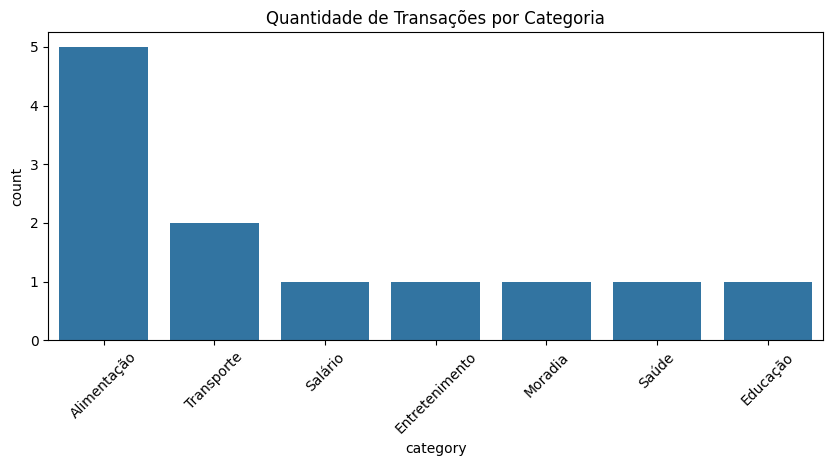

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x=df["category"])
plt.title("Quantidade de Transações por Categoria")
plt.xticks(rotation=45)
plt.show()


####💰 Soma de valores por categoria

Cria uma visualização que soma a quantidade de transações de cada categoria:

<strong>plt.figure(figsize=(10,4)):</strong> inicializa uma nova figura de gráfico com um tamanho de 10 polegadas de largura por 4 polegadas de altura. Para um gráfico seja legível com bom espaçamento.

<strong>df.groupby("category")</strong> Inicia a operação de agregação. Agrupa o DataFrame <strong>df </strong>com base nos valores únicos da coluna "category".

<strong>["amount"].sum()</strong> Seleciona a coluna <strong>"amount"</strong> dentro de cada grupo criado e calcula a soma de todos os valores dentro dessa coluna para cada categoria. O resultado é uma nova Série Pandas onde o índice é a categoria e o valor é o total somado.

<strong>.sort_values()</strong> Ordena a Série Pandas resultante em ordem crescente com base nos valores somados (amount).

<strong>.plot(kind="bar")</strong> Chama a função de plotagem <strong>Matplotlib</strong> para desenhar a Série ordenada como um gráfico de barras vertical (kind="bar").

<strong>plt.title("Valor Total por Categoria")</strong> Define o título do gráfico como <strong>"Valor Total por Categoria"</strong>.

<strong>plt.ylabel("Valor (R$)")</strong> Define o rótulo <strong>(descrição)</strong> do eixo vertical <strong>(Y)</strong>, que representa o valor total somado.

<strong>plt.xticks(rotation=45)</strong> Rotaciona os rótulos do eixo X <strong>(os nomes das categorias)</strong> em 45 graus. Isso é essencial quando os nomes das categorias são longos e podem se sobrepor.

<strong>plt.show()</strong> Exibe o gráfico final, é necessária para renderizar o gráfico na tela.

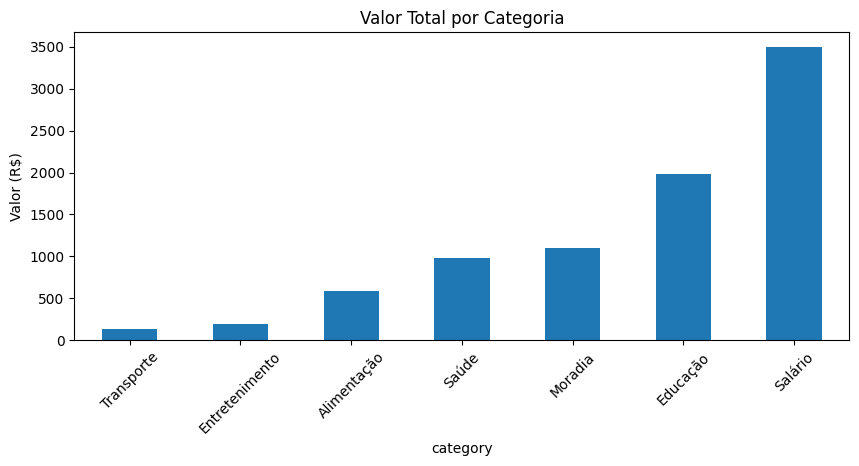

In [ ]:
plt.figure(figsize=(10,4))
df.groupby("category")["amount"].sum().sort_values().plot(kind="bar")
plt.title("Valor Total por Categoria")
plt.ylabel("Valor (R$)")
plt.xticks(rotation=45)
plt.show()


####📌 8. Exportação do Dataset Final (Load)
💾 Salvando o CSV transformado

Último passo do processo de ETL (Extração, Transformação, Carga) e é responsável por exportar o seu conjunto de dados transformado:

<strong>from google.colab import files:</strong> Importa o módulo files da biblioteca google.colab e fornece funcionalidades para interagir com o sistema de arquivos, incluindo o download de arquivos para o seu computador local.

<strong>df.to_csv("transacoes_classificadas.csv", index=False):</strong> Função do Pandas que salva o seu DataFrame <strong>df</strong> em um arquivo CSV.
<strong>"transacoes_classificadas.csv":</strong> É o nome que será dado ao arquivo CSV no ambiente do Colab.

<strong>index=False:</strong> Garante que o índice do DataFrame (aqueles números que o Pandas adiciona automaticamente à esquerda) não seja salvo como uma coluna no arquivo CSV. Isso é desejável para manter o arquivo limpo.

<strong>files.download("transacoes_classificadas.csv"):</strong> Depois que o arquivo CSV é criado no ambiente do Colab, esta linha usa a função <strong>download()</strong> do módulo files para iniciar o processo de download desse arquivo <strong>(transacoes_classificadas.csv) </strong>para o seu computador local.

<strong>Obs:</strong>Você verá um prompt ou o download começará automaticamente no seu navegador, dependendo das suas configurações.

In [ ]:
from google.colab import files
df.to_csv("transacoes_classificadas.csv", index=False)
files.download("transacoes_classificadas.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>